In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 받아오기

In [118]:
# 순서대로 가, 내, 댜, 베, 튜, 프
pattern_data=[]
polarization_pattern_data=[]
f= open("C:/Users/jongt/Desktop/코드/hopfield.txt",'r')
while True:
    v=f.readline().strip().replace(" ","")
    data = [int(i) for i in v]
    polarization_data=[2*int(i)-1 for i in v]
    if v is None or len(v) == 0:
        break
    pattern_data.append(np.array(data).reshape(1,121))
    polarization_pattern_data.append(np.array(polarization_data).reshape(1,121))
f.close()

In [202]:
class HopfieldNetwork:
    def __init__(self):
        self.t = np.array([0]*121*121).reshape(121,121)

    def learn_t(self, polarization_pattern_data):
        for i in range(6):
            self.t=self.t+np.dot(polarization_pattern_data[i].transpose(),polarization_pattern_data[i])
        self.t=self.t-np.identity(121)*6
        

    def noise_generator(self,sample_data_num, distance, pattern_data):
        noise_v=pattern_data[sample_data_num].copy()
        for i in range(distance):
            noise_index=np.random.randint(0,121)
            noise_v[0][noise_index]=(noise_v[0][noise_index]-1)*(-1)
        return noise_v   
                           
    def evaluate(self,sample_data_num, noise_v,pattern_data):
        count=0
        energy_list=[]
        for i in range(121):
            if noise_v[0][i]==pattern_data[sample_data_num][0][i]:
                count+=1
        for i in range(6):
            energy=self.energy_evaluation(pattern_data[i])
            energy_list.append(energy)
        noise_energy=self.energy_evaluation(noise_v)
        distinction=noise_energy-energy_list[sample_data_num]
       
        return count, distinction
    
    def energy_evaluation(self,data):
        energy=(-0.5)*np.dot(np.dot(data,self.t),data.transpose())[0][0]
        
        return energy
                           
    def lenrn_hopfield(self ,sample_data_num,pattern_data,polarization_pattern_data, time):
        self.learn_t(polarization_pattern_data)
        noise_v=self.noise_generator(sample_data_num,10,pattern_data)
        time_list=[]
        count_list=[]
        distinction_list=[]
        plt.imshow(noise_v.reshape(11,11))
        plt.show()
        noise_v.reshape(1,121)
        for i in range(time):
            time_list.append(i)
            random_index=np.random.randint(0,121)
            tv=np.dot(self.t,noise_v.transpose())
            if tv[random_index][0]>=0:
                noise_v[0][random_index]=1
            elif tv[random_index][0]< 0:
                noise_v[0][random_index]=0
            count,distinction=self.evaluate(sample_data_num, noise_v,pattern_data)
            count_list.append(121-count)
            distinction_list.append(distinction)
            if count==121:
                break
        plt.imshow(noise_v.reshape(11,11))
        plt.show()
        plt.plot(time_list,count_list)
        plt.xlabel("time")
        plt.ylabel("distance")
        plt.show()
        plt.plot(time_list,distinction_list)
        plt.xlabel("time")
        plt.ylabel("energy distinction")
        plt.show()
                
            
            
            
            
        

In [203]:
a=HopfieldNetwork()

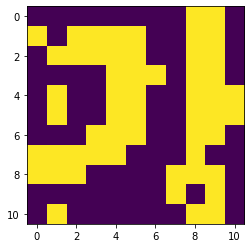

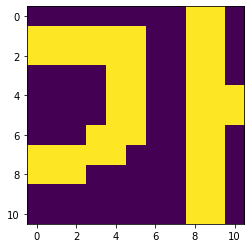

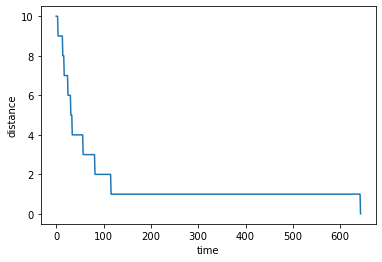

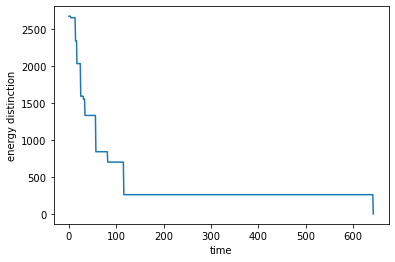

In [208]:
a.lenrn_hopfield(0,pattern_data,polarization_pattern_data,3000)

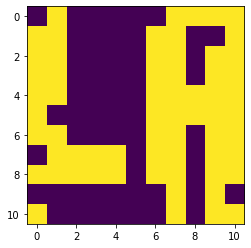

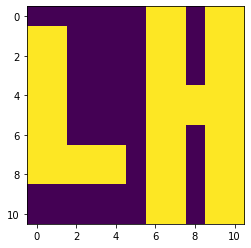

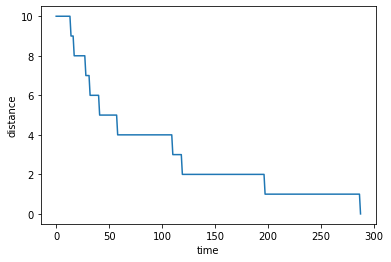

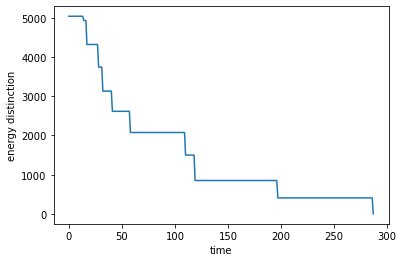

In [209]:
a.lenrn_hopfield(1,pattern_data,polarization_pattern_data,3000)

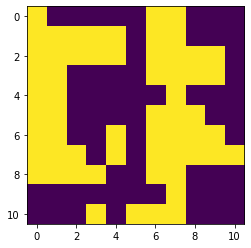

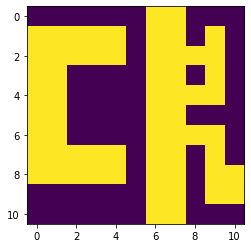

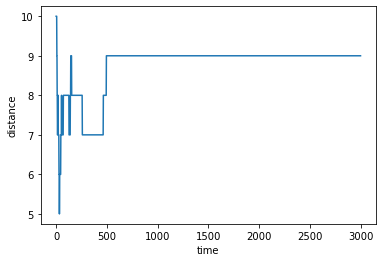

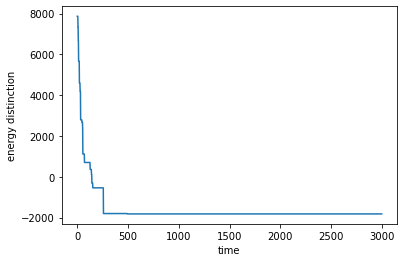

In [212]:
a.lenrn_hopfield(2,pattern_data,polarization_pattern_data,3000)

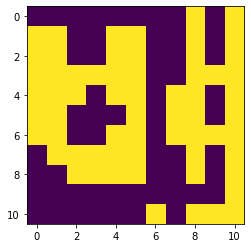

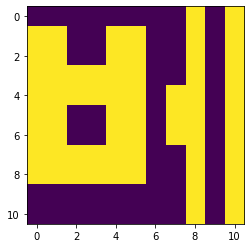

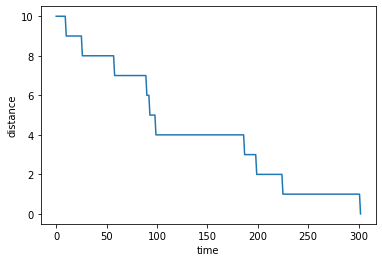

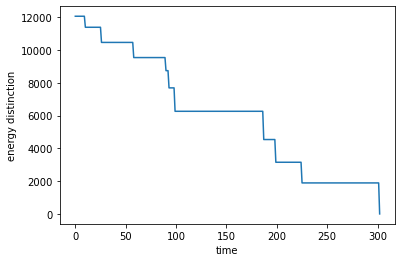

In [158]:
a.lenrn_hopfield(3,pattern_data,polarization_pattern_data,3000)

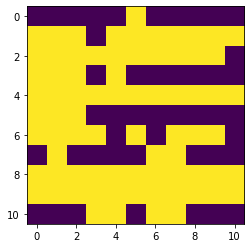

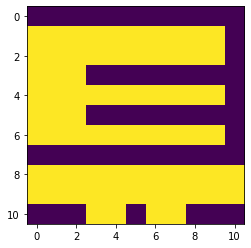

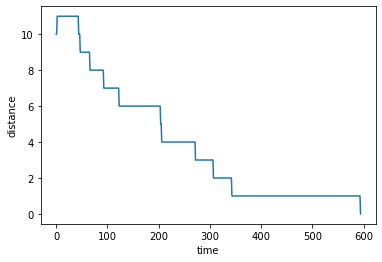

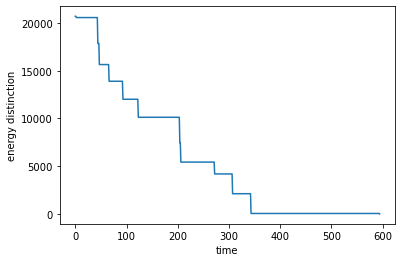

In [160]:
a.lenrn_hopfield(4,pattern_data,polarization_pattern_data,3000)

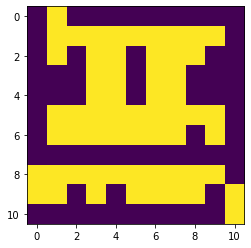

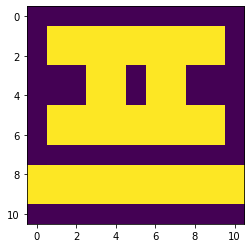

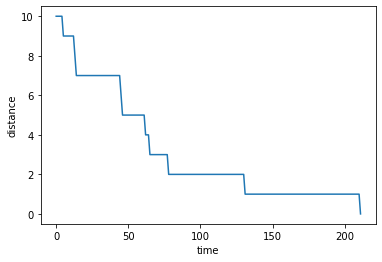

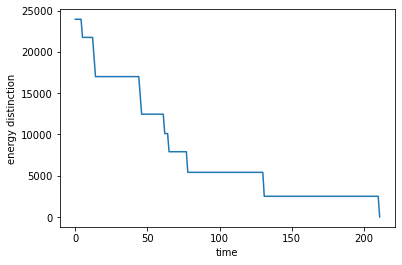

In [162]:
a.lenrn_hopfield(5,pattern_data,polarization_pattern_data,3000)